## miRNA Sequencing Classification With Machine Learning
### Author: `Bodhayan Prasad`
Apply a classification model that can predict a miRNA's function based on it's sequence of the coding sequence alone.

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x:'%.2f' % x)

In [23]:
rnaseq = pd.read_table('rnaseq.tab')
rnaseq.head()

,id_mature,miRBase_mature_miRNA_ID,id_hairpin,miRBase_precursor_miRNA_ID,Type,norm_mean_MDCK,norm_mean_MDCK-Ras,Fold_Change,Log2_Fold_Change,p_value,p_adjusted_value,more,sig,bin,class
0,cfa-let-7a,MIMAT0006594,cfa-let-7a-1,MI0007989,Canis,108436.76,144187.05,1.33,0.41,0.39,0.53,1,0,10,1
1,cfa-let-7a,MIMAT0006594,cfa-let-7a-2,MI0010328,Canis,108768.53,144483.13,1.33,0.41,0.39,0.53,1,0,10,1
2,cfa-let-7c,MIMAT0006669,cfa-let-7c,MI0008076,Canis,367.45,491.74,1.34,0.42,0.61,0.73,1,0,10,1
3,cfa-let-7e,MIMAT0006608,cfa-let-7e,MI0008004,Canis,8311.05,28849.52,3.47,1.80,0.00,0.01,1,1,11,3
4,cfa-let-7f,MIMAT0006610,cfa-let-7f,MI0008006,Canis,254701.36,277863.24,1.09,0.13,0.85,0.90,1,0,10,1


In [24]:
rnaseq.shape

(189, 15)

[53 47 39 50]


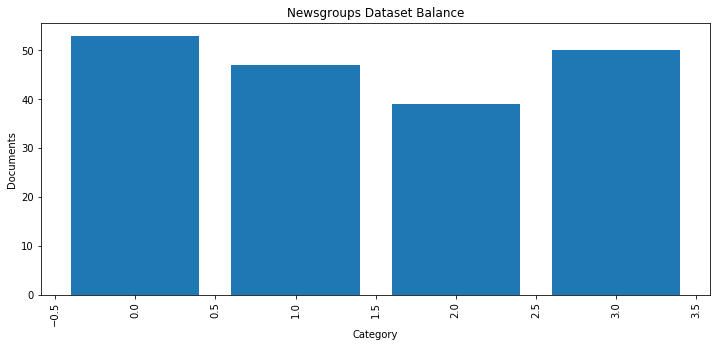

In [25]:
bincount = np.bincount(rnaseq['class'])
print(bincount)
plt.figure(figsize=(12,5))
plt.bar([0,1,2,3], bincount)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Documents")
plt.title("Newsgroups Dataset Balance")
plt.show()

In [26]:
hairpin = pd.read_table('hairpin.tab')
hairpin.head()

,id_hairpin,seq_hairpin
0,cel-let-7,UACACUGUGGAUCCGGUGAGGUAGUAGGUUGUAUAGUUUGGAAUAU...
1,cel-lin-4,AUGCUUCCGGCCUGUUCCCUGAGACCUCAAGUGUGAGUGUACUAUU...
2,cel-mir-1,AAAGUGACCGUACCGAGCUGCAUACUUCCUUACAUGCCCAUACUAU...
3,cel-mir-2,UAAACAGUAUACAGAAAGCCAUCAAAGCGGUGGUUGAUGUGUUGCA...
4,cel-mir-34,CGGACAAUGCUCGAGAGGCAGUGUGGUUAGCUGGUUGCAUAUUUCC...


In [27]:
mature = pd.read_table('mature.tab')
mature.head()

,id_mature,seq_mature
0,cel-let-7-5p,UGAGGUAGUAGGUUGUAUAGUU
1,cel-let-7-3p,CUAUGCAAUUUUCUACCUUACC
2,cel-lin-4-5p,UCCCUGAGACCUCAAGUGUGA
3,cel-lin-4-3p,ACACCUGGGCUCUCCGGGUACC
4,cel-miR-1-5p,CAUACUUCCUUACAUGCCCAUA


In [28]:
df_hairpin=pd.merge(hairpin, rnaseq)
df_hairpin.head()

,id_hairpin,seq_hairpin,id_mature,miRBase_mature_miRNA_ID,miRBase_precursor_miRNA_ID,Type,norm_mean_MDCK,norm_mean_MDCK-Ras,Fold_Change,Log2_Fold_Change,p_value,p_adjusted_value,more,sig,bin,class
0,cfa-mir-429,AGCCUGCUGAUGGGCGUCUUACCAGACACGGUUAGAUCUGGGUUCU...,cfa-miR-429,MIMAT0001539,MI0001644,Canis,10044.39,1796.64,0.18,-2.48,0.00,0.00,0,1,1,2
1,cfa-mir-365-2,AGAGUGUUCAAGGACAGCAAGAAAAAUGAGGGACUUUCAGGGGCAG...,cfa-miR-365,MIMAT0001540,MI0001647,Canis,1304.97,3422.40,2.62,1.39,0.00,0.00,1,1,11,3
2,cfa-mir-450a,GAAAGAUGCUGAACUGUUUUUGCGAUGUGUUCCUAAUAUGCAGUAU...,cfa-miR-450a,MIMAT0001548,MI0001655,Canis,266.21,149.17,0.56,-0.84,0.03,0.07,0,0,0,0
3,cfa-mir-365-1,ACCGCAGGGAAAAUGAGGGACUUUUGGGGGCAGAUGUGUUUCCAUU...,cfa-miR-365,MIMAT0001540,MI0001657,Canis,1304.97,3422.40,2.62,1.39,0.00,0.00,1,1,11,3
4,cfa-let-7a-1,UGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUCUGGGUA...,cfa-let-7a,MIMAT0006594,MI0007989,Canis,108436.76,144187.05,1.33,0.41,0.39,0.53,1,0,10,1


In [29]:
df_hairpin.shape

(189, 16)

In [30]:
df_mature=pd.merge(mature, rnaseq)
df_mature.head()

,id_mature,seq_mature,miRBase_mature_miRNA_ID,id_hairpin,miRBase_precursor_miRNA_ID,Type,norm_mean_MDCK,norm_mean_MDCK-Ras,Fold_Change,Log2_Fold_Change,p_value,p_adjusted_value,more,sig,bin,class
0,cfa-miR-429,UAAUACUGUCUGGUAAUGCCGU,MIMAT0001539,cfa-mir-429,MI0001644,Canis,10044.39,1796.64,0.18,-2.48,0.00,0.00,0,1,1,2
1,cfa-miR-365,UAAUGCCCCUAAAAAUCCUUAU,MIMAT0001540,cfa-mir-365-1,MI0001657,Canis,1304.97,3422.40,2.62,1.39,0.00,0.00,1,1,11,3
2,cfa-miR-365,UAAUGCCCCUAAAAAUCCUUAU,MIMAT0001540,cfa-mir-365-2,MI0001647,Canis,1304.97,3422.40,2.62,1.39,0.00,0.00,1,1,11,3
3,cfa-miR-450a,UUUUUGCGAUGUGUUCCUAAUA,MIMAT0001548,cfa-mir-450a,MI0001655,Canis,266.21,149.17,0.56,-0.84,0.03,0.07,0,0,0,0
4,cfa-let-7a,UGAGGUAGUAGGUUGUAUAGUU,MIMAT0006594,cfa-let-7a-1,MI0007989,Canis,108436.76,144187.05,1.33,0.41,0.39,0.53,1,0,10,1


In [31]:
df_mature.shape

(189, 16)

In [32]:
hairpin_data=df_mature[['seq_mature','sig']]
hairpin_data.columns = ['sequence','class']
hairpin_data.head()

,sequence,class
0,UAAUACUGUCUGGUAAUGCCGU,1
1,UAAUGCCCCUAAAAAUCCUUAU,1
2,UAAUGCCCCUAAAAAUCCUUAU,1
3,UUUUUGCGAUGUGUUCCUAAUA,0
4,UGAGGUAGUAGGUUGUAUAGUU,0


In [33]:
hairpin_data.shape

(189, 2)

In [34]:
hairpin_data=hairpin_data.drop_duplicates()
hairpin_data.shape

(161, 2)

### Here are the definitions for each of the 4 classes. They are miRNA sequence function groups.

```
Class Expr Sign
0     more  no
1     less  yes
2     more  no
3     less  yes
```

### Treating a sequence as a "language", otherwise known as  k-mer counting

A challenge that remains is that none of these above methods results in vectors of uniform length, and that is a requirement for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length.

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

The method I use here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

Here I am using hexamer “words” but that is arbitrary and word length can be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.

In genomics, we refer to these types of manipulations as "k-mer counting", or counting the occurances of each possible k-mer sequence. There are specialized tools for this, but the Python natural language processing tools make it supe easy.

Here is a function that can be used to convert any sequence (string) to overlapping k-mer words:

### Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [35]:
# function to convert sequence strings into k-mer words, default size = 5 (pentamer words)
def getKmers(sequence, size=5):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

## Now we can convert our training data sequences into short overlapping  k-mers of length 5.  Lets do that for each species of data we have using our getKmers function.

In [36]:
hairpin_data['words'] = hairpin_data.apply(lambda x: getKmers(x['sequence']), axis=1)
hairpin_data = hairpin_data.drop('sequence', axis=1)

### Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 5 and ready for the next step.  Let's take a look.

In [37]:
hairpin_data.head()

,class,words
0,1,"[uaaua, aauac, auacu, uacug, acugu, cuguc, ugu..."
1,1,"[uaaug, aaugc, augcc, ugccc, gcccc, ccccu, ccc..."
3,0,"[uuuuu, uuuug, uuugc, uugcg, ugcga, gcgau, cga..."
4,0,"[ugagg, gaggu, aggua, gguag, guagu, uagua, agu..."
6,1,"[uucaa, ucaag, caagu, aagua, aguaa, guaau, uaa..."


### Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use.  We can also make a y variable to hold the class labels.  Let's do that now.

In [38]:
hairpin_texts = list(hairpin_data['words'])
for item in range(len(hairpin_texts)):
    hairpin_texts[item] = ' '.join(hairpin_texts[item])
y_data = hairpin_data.iloc[:, 0].values                         

In [39]:
print(hairpin_texts[2])

uuuuu uuuug uuugc uugcg ugcga gcgau cgaug gaugu augug ugugu guguu uguuc guucc uuccu uccua ccuaa cuaau uaaua


In [40]:
y_data

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1], dtype=int64)

## Bag-of-Words (BoW)

In [41]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# Fit and Transform
#cv.fit(hairpin_texts)
#X = cv.transform(hairpin_texts)
bow_X = cv.fit_transform(hairpin_texts)

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
#print("Vocabulary content:\n {}".format(cv.vocabulary_))

Vocabulary size: 879


## n-Grams: BOW with More Than One Word

In [42]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(3,4))

# Fit and Transform
#cv.fit(hairpin_texts)
#X = cv.transform(hairpin_texts)
ngram_X = cv.fit_transform(hairpin_texts)

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
#print("Vocabulary content:\n {}".format(cv.vocabulary_))

Vocabulary size: 4168


In [43]:
print(ngram_X.shape)

(161, 4168)


# Term Frequency–Inverse Document Frequency (TFiDF)
Tf-idf is a method used to evaluate how important a word is to a document in a collection.The more often a word appears in a document, the more important it is, but this is offset by how often the word appears in all of the documents.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import make_pipeline

tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(hairpin_texts)
print("Vocabulary size: {}".format(len(tf_idf_vectorizer.vocabulary_)))
#print("Vocabulary content:\n {}".format(tf_idf_vectorizer.vocabulary_))
tfidf_X = tf_idf_vectorizer.transform(hairpin_texts)
print("Tfidf: {}".format(repr(tfidf_X)))

Vocabulary size: 879
Tfidf: <161x879 sparse matrix of type '<class 'numpy.float64'>'
	with 2854 stored elements in Compressed Sparse Row format>


### If we have a look at class balance we can see we have relatively balanced dataset.

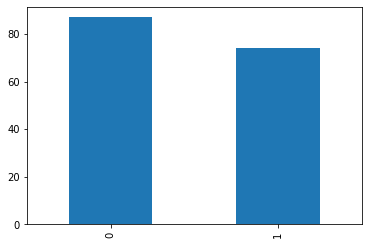

In [45]:
hairpin_data['class'].value_counts().sort_index().plot.bar()

In [46]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(bow_X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42,
                                                    shuffle=True)
ngram_X_train, ngram_X_test, ngram_y_train, ngram_y_test = train_test_split(ngram_X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42,
                                                    shuffle=True)
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidf_X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42,
                                                    shuffle=True)

In [47]:
print(bow_X_train.shape)
print(bow_X_test.shape)

(128, 879)
(33, 879)


In [48]:
print(bow_y_test.sum())
print(ngram_y_test.sum())
print(tfidf_y_test.sum())

17
17
17


In [49]:
print("Baseline accuracy = %.2f " %(100*20/38))

Baseline accuracy = 52.63 


## Model Training

In [50]:
from sklearn import metrics

def get_metrics(testing_labels, predictions):
    cmat=metrics.confusion_matrix(testing_labels, predictions)
    cm = pd.crosstab(pd.Series(testing_labels, name='Actual'), pd.Series(predictions, name='Predicted'))
    accuracy = metrics.accuracy_score(testing_labels, predictions)
    ck = metrics.cohen_kappa_score(testing_labels, predictions)
    precision = metrics.precision_score(testing_labels, predictions, average='weighted')
    recall = metrics.recall_score(testing_labels, predictions, average='weighted')
    f1 = metrics.f1_score(testing_labels, predictions, average='weighted')
    mcc = metrics.matthews_corrcoef(testing_labels, predictions, sample_weight=None)
    return cmat, cm, accuracy, ck, precision, recall, f1, mcc

def train_model(classifier, training_data, training_labels, testing_data):
    classifier.fit(training_data, training_labels)
    predictions = classifier.predict(testing_data)
    return predictions

In [51]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

#Chose a few popular classifiers for text classification
classifiers = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(), MultinomialNB(), DecisionTreeClassifier()]
label = list()
cm  = list()
acc = list()
ck  = list()
pre = list()
rec = list()
f1  = list()
mcc = list()
ngram_pred = list()

for classifier in classifiers:
    bow_y_pred = train_model(classifier, bow_X_train, bow_y_train, bow_X_test)
    bow_cmat, bow_cm, bow_accuracy, bow_ck, bow_precision, bow_recall, bow_f1, bow_mcc = get_metrics(bow_y_test, bow_y_pred)
    label.append("BOW " + classifier.__class__.__name__)
    cm.append(bow_cm)
    acc.append(bow_accuracy)
    ck.append(bow_ck)
    pre.append(bow_precision)
    rec.append(bow_recall)
    f1.append(bow_f1)
    mcc.append(bow_mcc)
    
    ngram_y_pred = train_model(classifier, ngram_X_train, ngram_y_train, ngram_X_test)
    ngram_cmat, ngram_cm, ngram_accuracy, ngram_ck, ngram_precision, ngram_recall, ngram_f1, ngram_mcc = get_metrics(ngram_y_test, ngram_y_pred)
    label.append("BOW N-GRAM " + classifier.__class__.__name__)
    cm.append(ngram_cm)
    acc.append(ngram_accuracy)
    ck.append(ngram_ck)
    pre.append(ngram_precision)
    rec.append(ngram_recall)
    f1.append(ngram_f1)
    mcc.append(ngram_mcc)
    ngram_pred.append(ngram_y_pred)
    
    tfidf_y_pred = train_model(classifier, tfidf_X_train, tfidf_y_train, tfidf_X_test)
    tfidf_cmat, tfidf_cm, tfidf_accuracy, tfidf_ck, tfidf_precision, tfidf_recall, tfidf_f1, tfidf_mcc = get_metrics(tfidf_y_test, tfidf_y_pred)
    label.append("TFIDF " + classifier.__class__.__name__)
    cm.append(tfidf_cm)
    acc.append(tfidf_accuracy)
    ck.append(tfidf_ck)
    pre.append(tfidf_precision)
    rec.append(tfidf_recall)
    f1.append(tfidf_f1)
    mcc.append(tfidf_mcc)
    
    print(classifier.__class__.__name__)
    print("BOW:")
    print(bow_cm)
    print("\t\t\taccuracy = %.3f cohens_kappa = %.3f precision = %.3f recall = %.3f f1 = %.3f mcc = %.3f" % (bow_accuracy, bow_ck, bow_precision, bow_recall, bow_f1, bow_mcc))
    print("NGRAM:")
    print(ngram_cm)
    print("\t\t\taccuracy = %.3f cohens_kappa = %.3f precision = %.3f recall = %.3f f1 = %.3f mcc = %.3f" % (ngram_accuracy, ngram_ck, ngram_precision, ngram_recall, ngram_f1, ngram_mcc))
    print("TFIDF:")
    print(tfidf_cm)
    print("\t\t\taccuracy = %.3f cohens_kappa = %.3f precision = %.3f recall = %.3f f1 = %.3f mcc = %.3f" % (tfidf_accuracy, tfidf_ck, tfidf_precision, tfidf_recall, tfidf_f1, ngram_mcc))
    print("\n")

C:\Users\Bodh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bodh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bodh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Bodh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bodh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

LogisticRegression
BOW:
Predicted   0  1
Actual          
0          14  2
1           9  8
			accuracy = 0.667 cohens_kappa = 0.341 precision = 0.707 recall = 0.667 f1 = 0.653 mcc = 0.376
NGRAM:
Predicted   0  1
Actual          
0          14  2
1          13  4
			accuracy = 0.545 cohens_kappa = 0.108 precision = 0.595 recall = 0.545 f1 = 0.495 mcc = 0.143
TFIDF:
Predicted   0
Actual       
0          16
1          17
			accuracy = 0.485 cohens_kappa = 0.000 precision = 0.235 recall = 0.485 f1 = 0.317 mcc = 0.143


SGDClassifier
BOW:
Predicted   0   1
Actual           
0          11   5
1           5  12
			accuracy = 0.697 cohens_kappa = 0.393 precision = 0.697 recall = 0.697 f1 = 0.697 mcc = 0.393
NGRAM:
Predicted  0   1
Actual          
0          7   9
1          5  12
			accuracy = 0.576 cohens_kappa = 0.144 precision = 0.577 recall = 0.576 f1 = 0.568 mcc = 0.149
TFIDF:
Predicted   0  1
Actual          
0          15  1
1           9  8
			accuracy = 0.697 cohens_kappa = 0.402 p

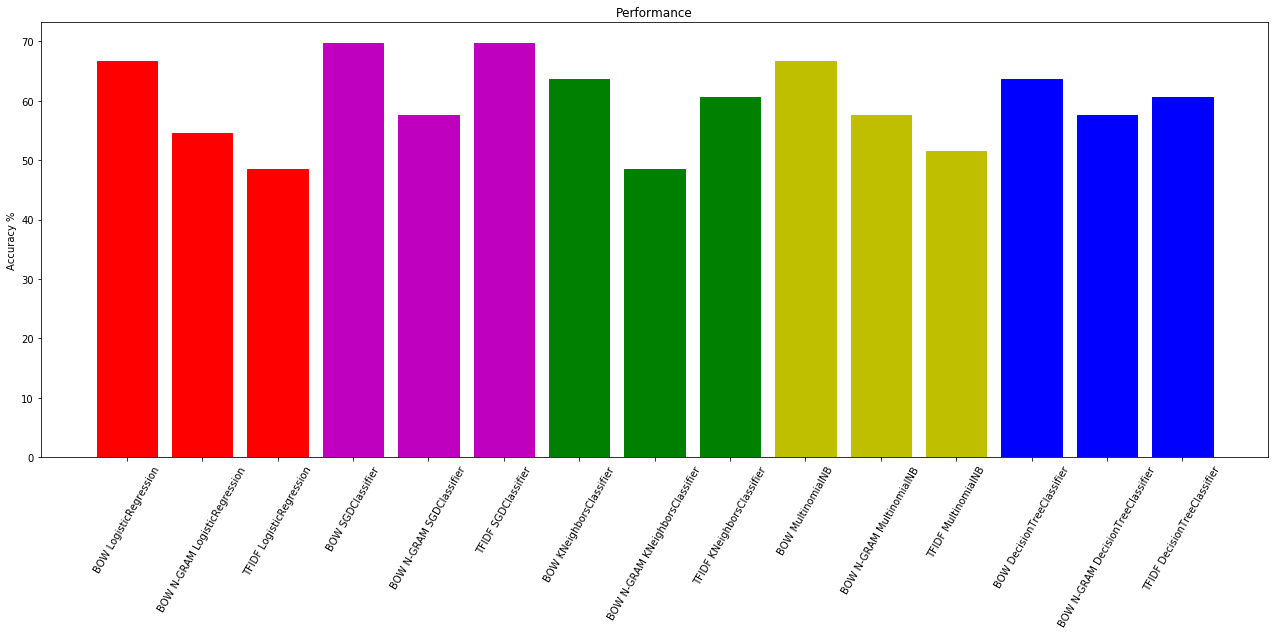

In [52]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
accuracy_results = [i * 100 for i in acc]
bars = plt.bar(index, accuracy_results)

plt.ylabel('Accuracy %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

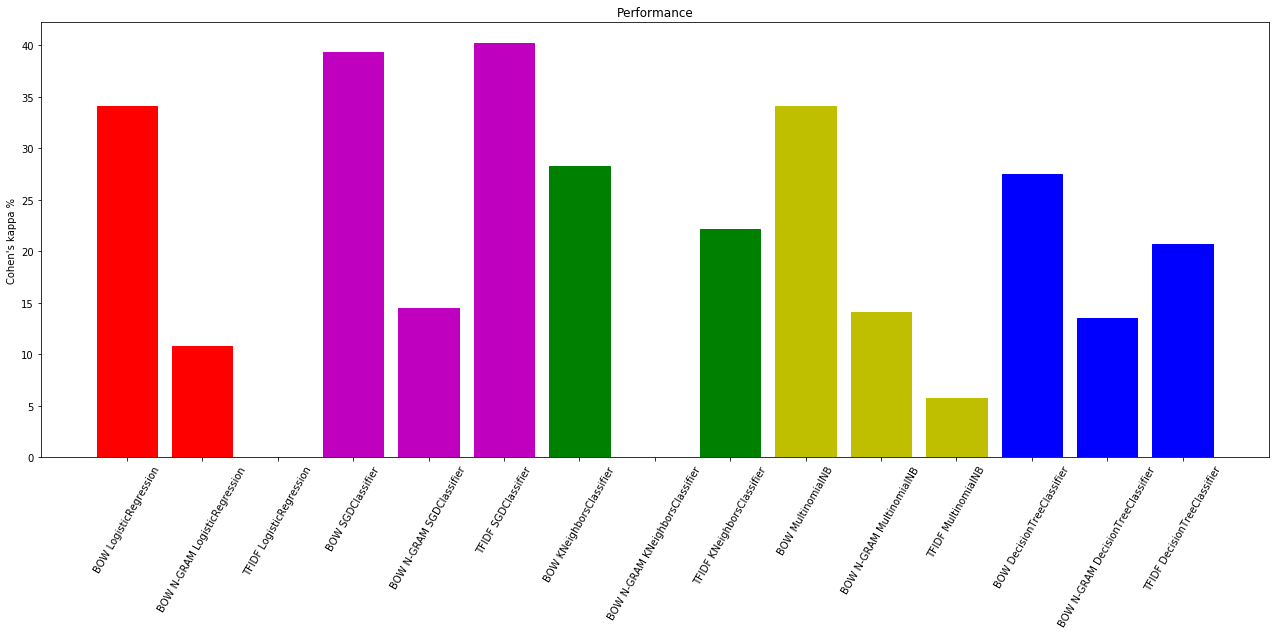

In [53]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
cohens_kappa_results = [i * 100 for i in ck]
bars = plt.bar(index, cohens_kappa_results)

plt.ylabel('Cohen\'s kappa %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

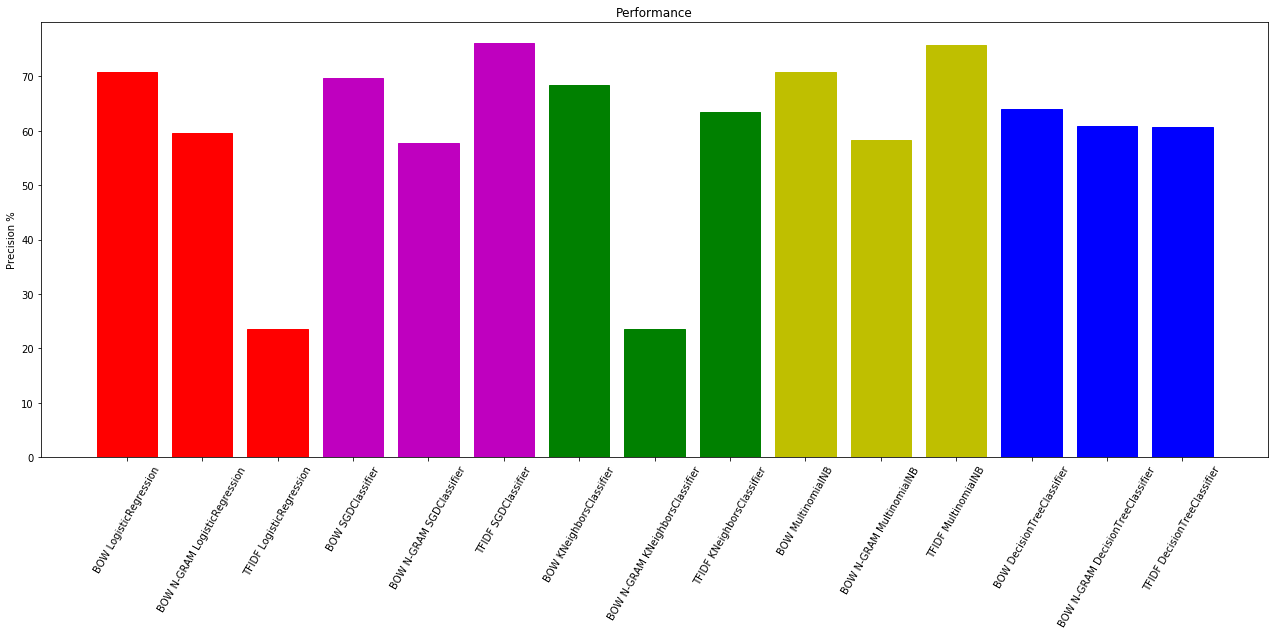

In [54]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
precision_results = [i * 100 for i in pre]
bars = plt.bar(index, precision_results)

plt.ylabel('Precision %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

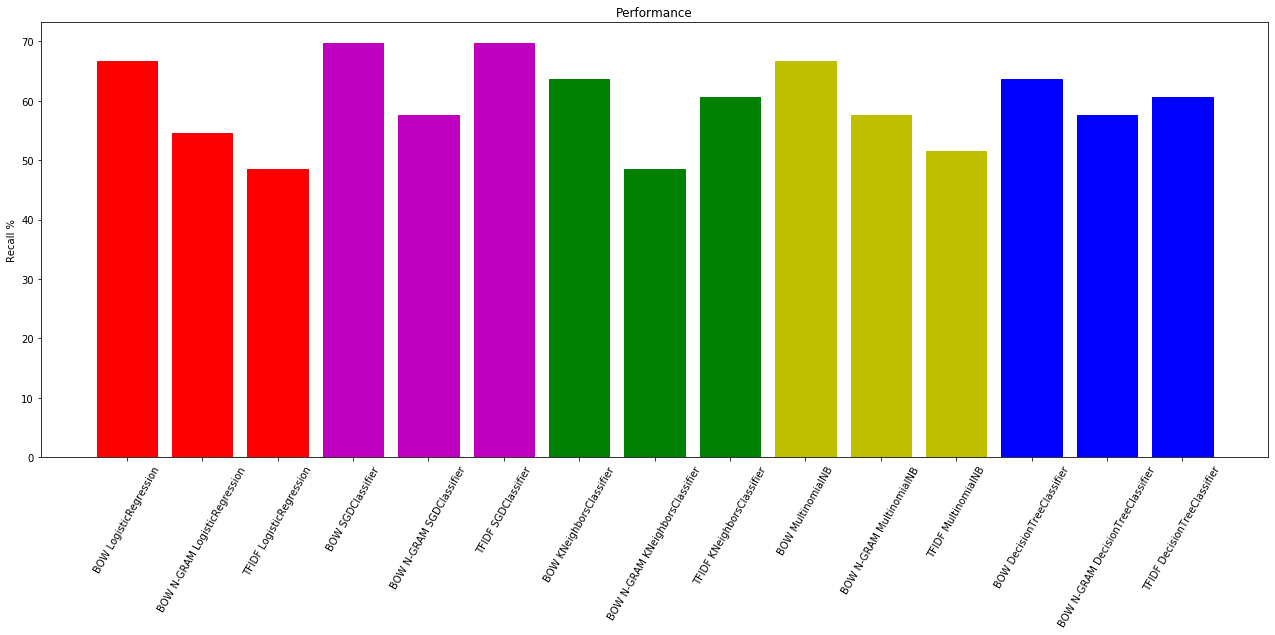

In [55]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
recall_results = [i * 100 for i in rec]
bars = plt.bar(index, recall_results)

plt.ylabel('Recall %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

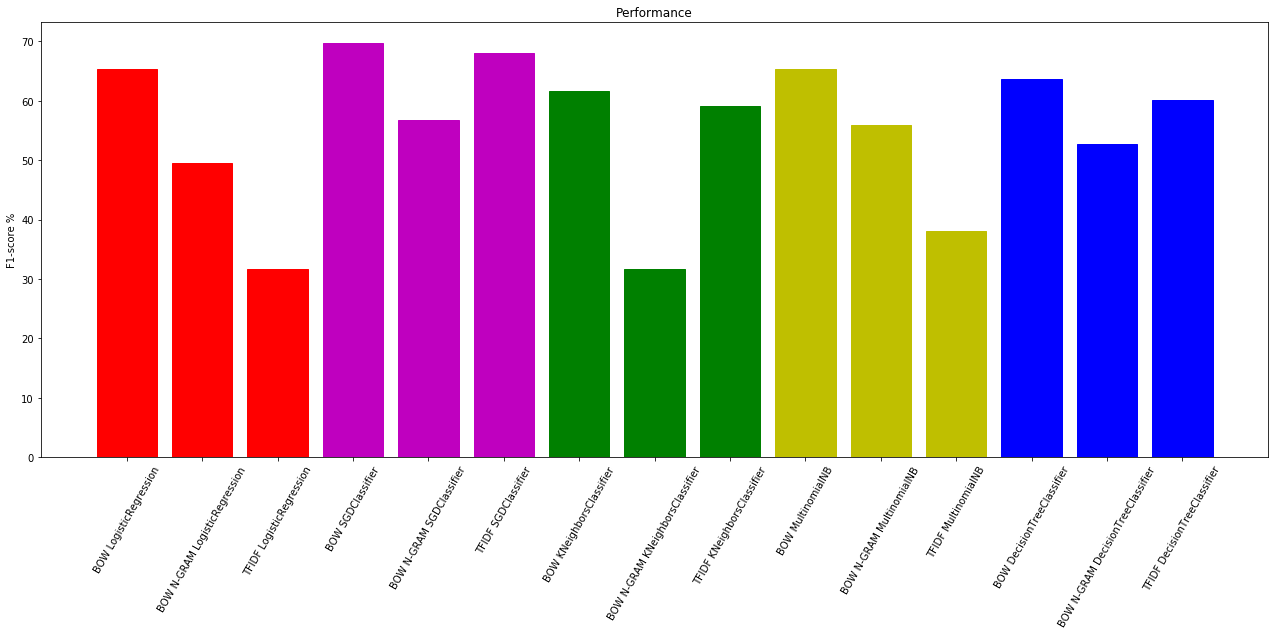

In [56]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
f1_results = [i * 100 for i in f1]
bars = plt.bar(index, f1_results)

plt.ylabel('F1-score %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

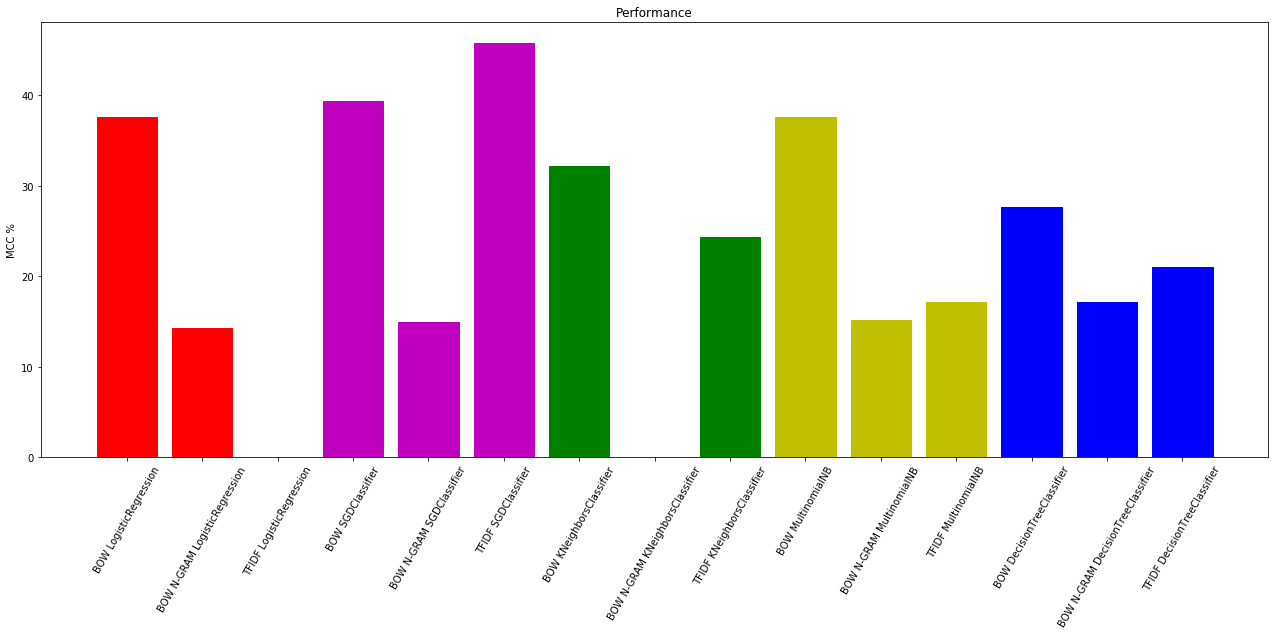

In [57]:
index = np.arange(len(label))
plt.figure(figsize=(22,8))
mcc_results = [i * 100 for i in mcc]
bars = plt.bar(index, mcc_results)

plt.ylabel('MCC %')
plt.xticks(index, label, rotation=60)
plt.title('Performance')

colors = ['r']*3 + ['m']*3 + ['g']*3 + ['y']*3 + ['b']*3 + ['k']*3 + ['c']*3
for item, color in zip(bars, colors):
     item.set_color(color)
plt.show()

## Bagging Method - concensus

In [58]:
ensmbl_pred=(ngram_pred[0]+ngram_pred[1]+ngram_pred[3])/3
ensmbl_pred[ensmbl_pred>=0.5]=1
ensmbl_pred[ensmbl_pred<0.5]=0

esmbl_cmat, esmbl_cm, esmbl_accuracy, esmbl_ck, esmbl_precision, esmbl_recall, esmbl_f1, esmbl_mcc = get_metrics(ngram_y_test, ensmbl_pred)

print("Ensembl of Ngrams:")
print(esmbl_cm)
print("\t\t\taccuracy = %.3f cohens_kappa = %.3f precision = %.3f recall = %.3f f1 = %.3f mcc = %.3f" % (esmbl_accuracy, esmbl_ck, esmbl_precision, esmbl_recall, esmbl_f1, esmbl_mcc))

Ensembl of Ngrams:
Predicted  0.00  1.00
Actual               
0             7     9
1             6    11
			accuracy = 0.545 cohens_kappa = 0.085 precision = 0.544 recall = 0.545 f1 = 0.540 mcc = 0.086


In [59]:
ensmbl_pred=(ngram_pred[0]+ngram_pred[3])/2
ensmbl_pred[ensmbl_pred>=0.5]=1
ensmbl_pred[ensmbl_pred<0.5]=0

esmbl_cmat, esmbl_cm, esmbl_accuracy, esmbl_ck, esmbl_precision, esmbl_recall, esmbl_f1, esmbl_mcc = get_metrics(ngram_y_test, ensmbl_pred)

print("Ensembl of Ngrams:")
print(esmbl_cm)
print("\t\t\taccuracy = %.3f cohens_kappa = %.3f precision = %.3f recall = %.3f f1 = %.3f mcc = %.3f" % (esmbl_accuracy, esmbl_ck, esmbl_precision, esmbl_recall, esmbl_f1, esmbl_mcc))

Ensembl of Ngrams:
Predicted  0.00  1.00
Actual               
0             6    10
1             4    13
			accuracy = 0.576 cohens_kappa = 0.141 precision = 0.582 recall = 0.576 f1 = 0.559 mcc = 0.152
